# **Executive Summary**

The purpose of this project was to complete a data sceince project utilising a publicly available dataset, to run a machine learning algorithim and finally to analyse the results. The dataset selected was 'Healthcare Diabetes Dataset', which was sourced from Kaggle. The aim of this project was to create a predicition model which would enable the prediction of Diabetes in a person based on multiple known variables entered. The project will also enable the identification of the variables that have the biggest impact or weighting on the probability of disabetes being present or not. The method selected for this project was Logisitic Regression. Logisitic Regression is often used for binary classification and was therefore the method selected for this analysis. Once the model had been trained and was run on the original train set,, it became apparent that in order to improve the model, the trained data should be scaled. This was achieved using the method of standardisation. Once this had taken place, the model was run and the metrics of the model were as follows: Accuracy: 78.2% and F1 Score: 0.65.
The type 2 error rate (false negatives) was relatively high at 14%. This is significant as the model is missing Diabetes being found. Further investigation and modelling could be performed to improve this error rate. Further recommendations for this project would be the implementation of other classifiction methods to see if this improves the model. This could include SVM (Support Vector Machine). SVM is a machine learning algorithim used for classification and regression tasks. The main goal of SVM is to maximise the margin between the two classes. The larger the margin, the better the model performs on new and unseen data.


## Pip Install

In [9]:
!pip install pandasql
!pip install sqlalchemy==1.4.46
!pip install sweetviz
!pip install lazypredict
!pip install yellowbrick
!pip install missingno

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26773 sha256=1a50f008f7edd513ad284650c3d46d13afbc6f036356b770b568502c14f9436d
  Stored in directory: /root/.cache/pip/wheels/15/a1/e7/6f92f295b5272ae5c02365e6b8fa19cb93f16a537090a1cf27
Successfully built pandasql
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 54.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.4.46-cp312-cp312-linux_x86_64.whl size=1610894 sha256=8060bfdcdbe16e95d3dcdd53a4ae3e09dca3a413df62afa03e1c1cf1f3481036
  Stored in directory: /root/.cache/pip/wheels/02/a2/82/ea179f8d421288f49b068fc735deb487f017b91a35651fc0d0
Successfully built sqlalchemy
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.43
    Uninstalling SQLAlchemy-2.0.43:
      Successfully uninstalled SQLAlchemy-2.0.43
ERROR: pip's dependency resolver does not currently take into account

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Libraries

In [60]:
import pandas as pd
#from pandasql import sqldf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sweetviz as sv
import missingno as msno
import os
from google.colab import drive
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


## Load the data

In [61]:
# Drive mount
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# change directory
os.chdir('/content/drive/MyDrive/datasets')

Uploaded the data to the location required

In [63]:
# load data
df = pd.read_csv('Healthcare-Diabetes.csv')

df.head(10)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1
5,6,5,116,74,0,0,25.6,0.201,30,0
6,7,3,78,50,32,88,31.0,0.248,26,1
7,8,10,115,0,0,0,35.3,0.134,29,0
8,9,2,197,70,45,543,30.5,0.158,53,1
9,10,8,125,96,0,0,0.0,0.232,54,1


Load of the top 10 rows of the data to visually see the components

## Exploratory Data Analysis

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [15]:
df.describe()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,1384.500000,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,799.197097,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,692.750000,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,1384.500000,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,2076.250000,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,2768.000000,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


The above analysis of the data indicates that the data is very disperse in a number of fields. Both the fields within each column and the variation of data values compared to one another are varied and therefore a suggestion for normalisation could be made.

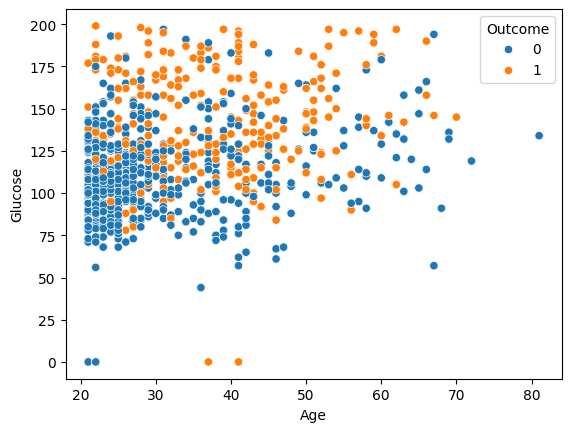

In [38]:
sns.scatterplot(x="Age", y="Glucose", hue="Outcome", data=df)
plt.show()

The above graph displays the relationship between 'Age' and 'Glucose' based on Outcome. There appears to be a strong correlation in lower age and lower glucose levels to no presence of Diabetes

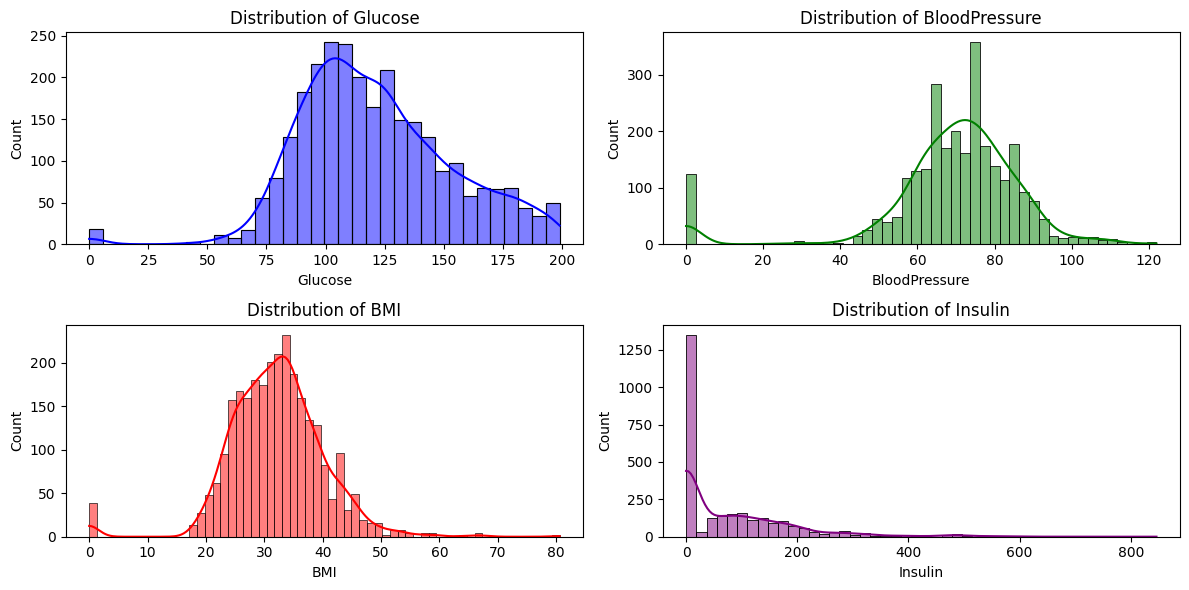

In [39]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.histplot(df['Glucose'], kde=True, color='blue')
plt.title('Distribution of Glucose')

plt.subplot(2, 2, 2)
sns.histplot(df['BloodPressure'], kde=True, color='green')
plt.title('Distribution of BloodPressure')

plt.subplot(2, 2, 3)
sns.histplot(df['BMI'], kde=True, color='red')
plt.title('Distribution of BMI')

plt.subplot(2, 2, 4)
sns.histplot(df['Insulin'], kde=True, color='purple')
plt.title('Distribution of Insulin')

plt.tight_layout()
plt.show()

The above graphs display the distribution amongst the variables; Glucose, Blood Pressure, BMI and Insulin. The first three appear to have normal (bell shaped) distribution, whereas Insulin has a skewed distribution

In [40]:
# Count number of full line duplicates
sum(df.duplicated())

0

In [19]:
df.notnull().sum()


,0
Id,2768
Pregnancies,2768
Glucose,2768
BloodPressure,2768
SkinThickness,2768
Insulin,2768
BMI,2768
DiabetesPedigreeFunction,2768
Age,2768
Outcome,2768


This indicates that the data is complete and has no null values. This indicates that there is no need to apply any data completeness techniques

[Text(0.5, 1.0, 'Checking how balanced the outcome variable is')]

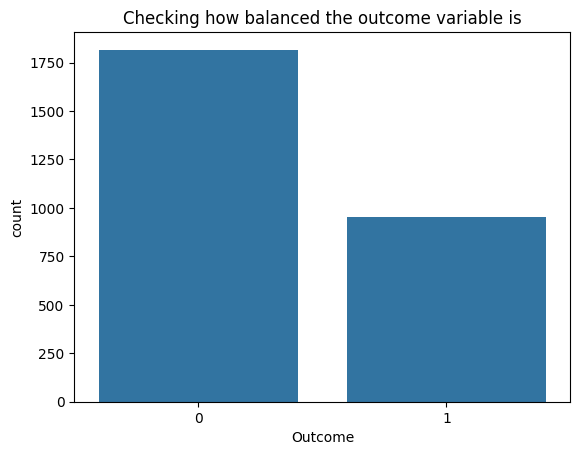

In [41]:
g = sns.countplot(data=df, x='Outcome')
g.set(title='Checking how balanced the outcome variable is')


The visual above suggests that there is a slight inbalance in the data. This should be taken into account as the project progresses as it will have an impact on the output prediction

## Splitting the data into Train and Test sets

In [42]:

from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1234, stratify=df['Outcome'])


The data is split into train and test sets. 80% of the data is used to train the model. The remaining 20% is reserved as test data - to be entered later on to test the model

In [43]:
print(df_train['Outcome'].value_counts(normalize=True))
print(df_test['Outcome'].value_counts(normalize=True))

Outcome
0    0.656278
1    0.343722
Name: proportion, dtype: float64
Outcome
0    0.655235
1    0.344765
Name: proportion, dtype: float64


The above is checking the proportion split of outcome variable within the train and test sets. Both sets of data have a proportioned data mix

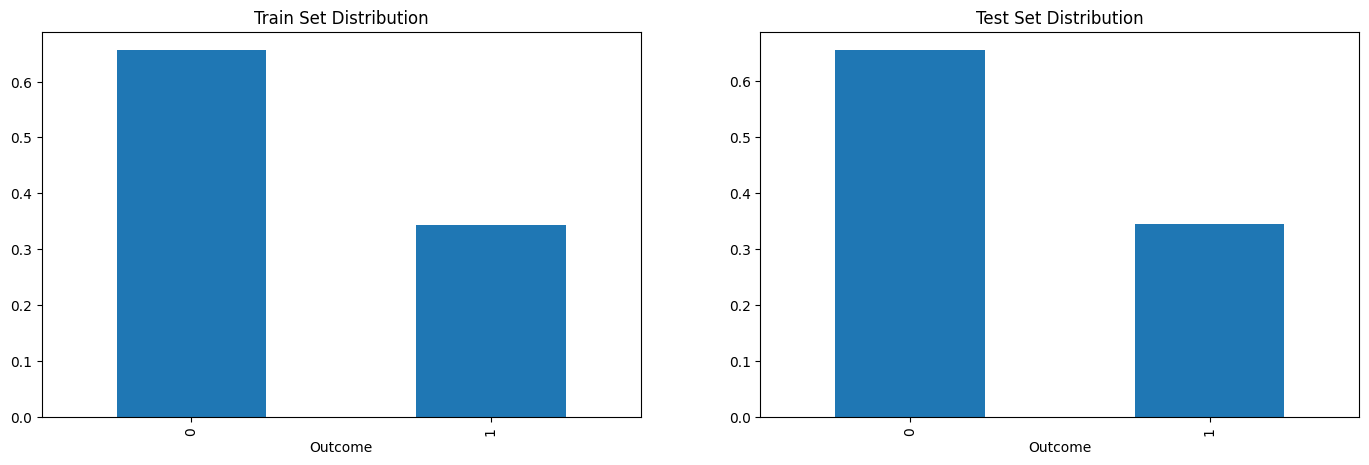

In [23]:
fig, axs = plt.subplots(ncols=2, figsize=(17, 5))
df_train['Outcome'].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Train Set Distribution")

df_test['Outcome'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title('Test Set Distribution')
plt.show()

Visually, it is apparent that the data has been split into train and test sets adequately

## Exploratory Data Analysis on the Train set

In [24]:
corr = df_train.corr(numeric_only = True)
corr


,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Id,1.000000,-0.014637,0.029097,0.013698,0.026681,0.010151,0.029579,-0.011892,0.001104,-0.001801
Pregnancies,-0.014637,1.000000,0.099011,0.145012,-0.048425,-0.073532,0.029250,-0.045180,0.539423,0.209193
Glucose,0.029097,0.099011,1.000000,0.137293,0.071454,0.328112,0.233070,0.125212,0.244327,0.456082
BloodPressure,0.013698,0.145012,0.137293,1.000000,0.204936,0.089641,0.297495,0.036196,0.235502,0.063560
SkinThickness,0.026681,-0.048425,0.071454,0.204936,1.000000,0.434855,0.399679,0.184865,-0.109724,0.087921
Insulin,0.010151,-0.073532,0.328112,0.089641,0.434855,1.000000,0.217075,0.188210,-0.086290,0.119382
BMI,0.029579,0.029250,0.233070,0.297495,0.399679,0.217075,1.000000,0.150594,0.049369,0.288203
DiabetesPedigreeFunction,-0.011892,-0.045180,0.125212,0.036196,0.184865,0.188210,0.150594,1.000000,0.005088,0.167818
Age,0.001104,0.539423,0.244327,0.235502,-0.109724,-0.086290,0.049369,0.005088,1.000000,0.223103
Outcome,-0.001801,0.209193,0.456082,0.063560,0.087921,0.119382,0.288203,0.167818,0.223103,1.000000


Reviewing the correlation between variables in the train set. There is a noticeable relationship between 'Age' and 'Pregnancies'

<Axes: >

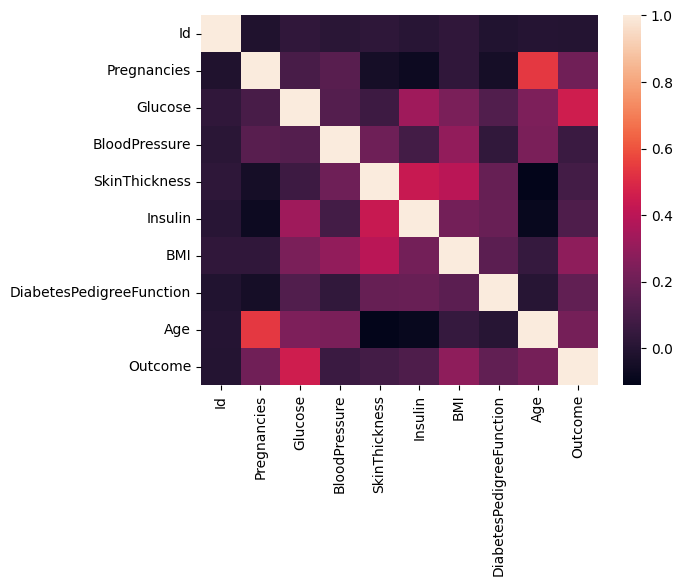

In [45]:
sns.heatmap(corr,
         xticklabels=corr.columns,
         yticklabels=corr.columns)

The lighter colours in the Heat Map above indicate the variables that have the most significant relationship to eachother. Glucose has the biggest affect on the Outcome variable

Identification of Outliers

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

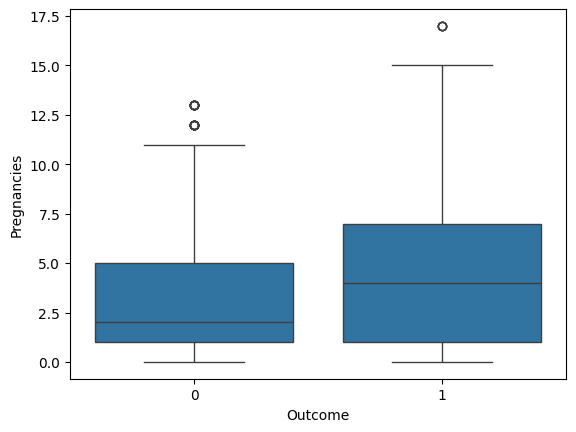

In [46]:
sns.boxplot(y="Pregnancies", x = "Outcome", data=df_train)

In [ ]:
## df1 = df[~(df['Pregnancies'] > 15) & (df['Outcome'] == 1)]

At this point, a suggestion could be to remove the displayed outliers. This may have an effect on the model

In [27]:
# Separating the Outcome variable (the 'y' variable)

X_train = df_train.drop('Outcome', axis=1)
X_test = df_test.drop('Outcome', axis=1)

y_train = df_train['Outcome']
y_test = df_test['Outcome']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(2214, 9)
(554, 9)
(2214,)
(554,)


In [28]:
X_train.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
977,978,7,184,84,33,0,35.5,0.355,41
407,408,0,101,62,0,0,21.9,0.336,25
2689,2690,1,163,72,0,0,39.0,1.222,33
2645,2646,7,187,68,39,304,37.7,0.254,41
759,760,6,190,92,0,0,35.5,0.278,66


## Training the Model

In [29]:
# train logistic regression (unscaled)
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

# step 1: initialise the model
model = LogisticRegression()

# step 2: train the model
model.fit(X_train, y_train)

# step 3: generate y_pred
y_pred = model.predict(X_test)



Training the logistic regression model with unscaled data.

## Scaling the Data

In [48]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [51]:

print(X_train['BMI'].mean())
print(X_train_scaled['BMI'].mean())
print(X_train_scaled['BMI'].std())


32.13979223125565
-2.0700093250463623e-16
1.0002259121230683


In [32]:
# training with the scaled data

# step 1: initialise the model
model_scaled = LogisticRegression()

# step 2: train the model
model_scaled.fit(X_train_scaled, y_train)

# step 3: generate y_pred
y_pred_scaled_model = model_scaled.predict(X_test_scaled)


# Reviewing the Model

In [33]:
# Metrics for the Model that uses unscaled data
accuracy = met.accuracy_score(y_test, y_pred)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

print("Accuracy stats for the unscaled data model:")
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2))

print("F1-score: ", np.round(f1*100.0,2))

Accuracy stats for the unscaled data model:
Accuracy: 70.0
Balanced Accuracy: 63.12
F1-score:  48.45


In [38]:
# Metrics for the Model that uses scaled data
accuracy = met.accuracy_score(y_test, y_pred_scaled_model)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred_scaled_model)
f1 = met.f1_score(y_test, y_pred_scaled_model)

print("Accuracy stats for the scaled data model:")
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2))

print("F1-score: ", np.round(f1*100.0,2))

Accuracy stats for the scaled data model:
Accuracy: 78.2
Balanced Accuracy: 73.53
F1-score:  64.93


###  Confusion Matrix

In [53]:
# confusion matrix
cm = met.confusion_matrix(y_test, y_pred)
print(cm)


[[310  53]
 [113  78]]


In [54]:
cm = met.confusion_matrix(y_test, y_pred_scaled_model)
print(cm)

[[321  42]
 [ 79 112]]


In [56]:
def visualize_classification(y_test, y_pred):
    """
    Visualizes the classification performance by displaying a classification report
    and a confusion matrix heatmap.
    """
    # Generate and print the classification report
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(cr)
    # Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred.round())

    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       363
           1       0.73      0.59      0.65       191

    accuracy                           0.78       554
   macro avg       0.76      0.74      0.75       554
weighted avg       0.78      0.78      0.78       554



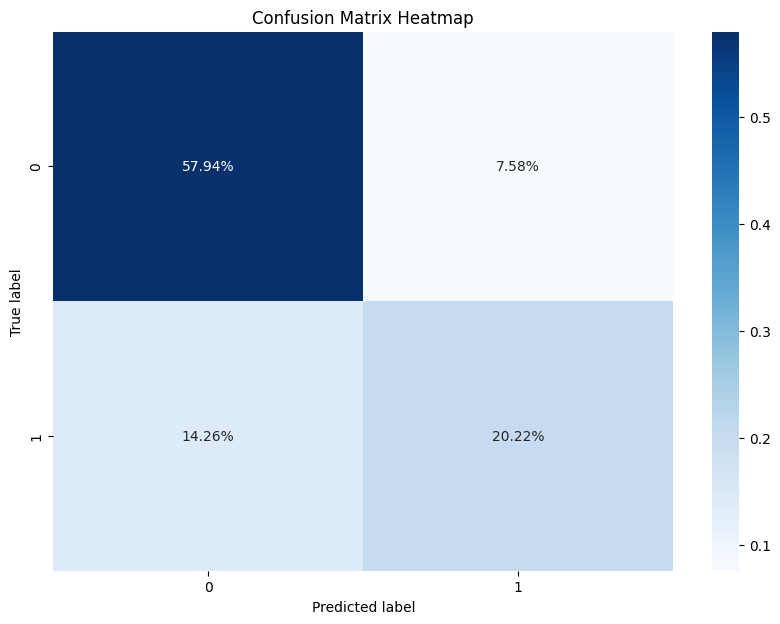

In [42]:
visualize_classification(y_test, y_pred_scaled_model)


The confusion matrix above indictes that there were 14% Type 2 errors. This is the prediction that Diabetes was not present '0', when the correct answer was Diabetes was present '1'.

# Interpreting the ML Model

In [57]:
coeff_df = pd.DataFrame(zip(X_train.columns, model_scaled.coef_[0]))
coeff_df.columns = ["feature","coefficient"]
coeff_df['exp'] = np.exp(coeff_df['coefficient'])
coeff_df

,feature,coefficient,exp
0,Id,-0.036504,0.964154
1,Pregnancies,0.420362,1.522513
2,Glucose,1.101478,3.008611
3,BloodPressure,-0.227771,0.796306
4,SkinThickness,0.018360,1.018530
5,Insulin,-0.166952,0.846240
6,BMI,0.665041,1.944570
7,DiabetesPedigreeFunction,0.317634,1.373874
8,Age,0.135151,1.144710


The above visual indicates that Glucose and BMI have the most significant impact within the model

Text(0.5, 0, 'Importance')

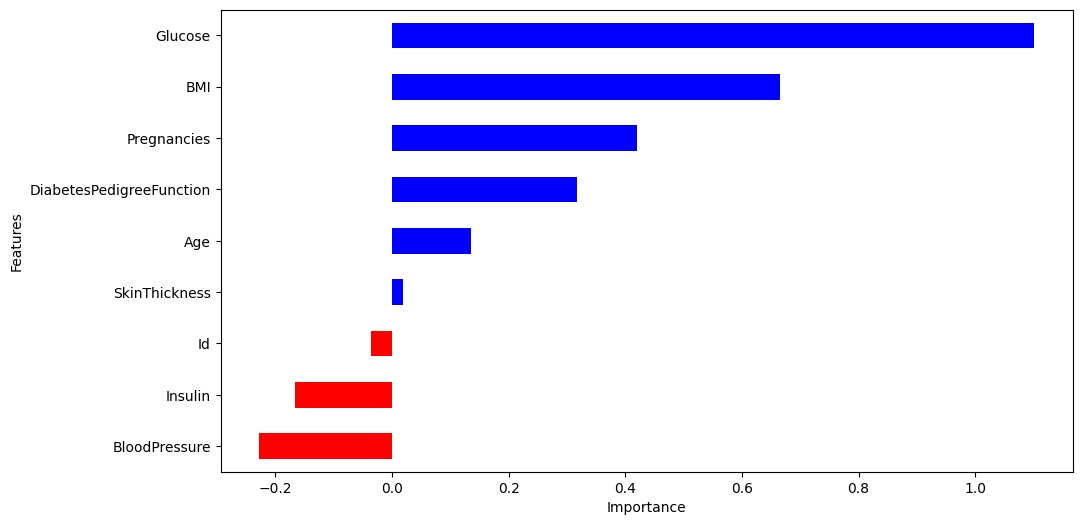

In [58]:
# Plotting the coefficients

coeff = list(model_scaled.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

# Results & Analysis



1) The model has an overall accuracy of 78.2%
2) The type 2 error rate (False negatives) is relatively high at 14%. This is important in this scenario as the model is missing diabetes being found. Type 2 errors are more of an issue than type 1 errors in this case. Further investigation and modelling is required to try to improve this error rate.
3) Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specifically Glucose level and BMI
4) Blood pressure and Insulin have a negative influence on the prediction

# Future Recommendations

Future recommendations for this project would be the implementation of other classification methods to see if this improves the model. This could include SVM (Support Vector Machine). SVM is a machine learning algorithim used for classification and regression tasks. The main goal of SVM is to maximise the margin between the two classes. The larger the margin, the better the model performs on new and unseen data.